Dodanie potrzebnych bibliotek


In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
from ann_visualizer.visualize import ann_viz
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd


2023-04-11 19:42:57.590049: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-11 19:42:57.632972: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-11 19:42:57.633719: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-11 19:42:58.393307: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Zaimportowanie danych z pliku "diabetes.csv" oraz podzielenie ich na zbiór treningowy oraz testowy


In [2]:
df = pd.read_csv("diabetes.csv")

df['class'] = list(
    map(lambda x: 0 if x == "tested_positive" else 1, df["class"]))

train_set, test_set = train_test_split(df.values, train_size=0.7)

train_inputs = train_set[:, 0:8]
train_classes = train_set[:, 8]

test_inputs = test_set[:, 0:8]
test_classes = test_set[:, 8]


Stworzenie modelu sieci neruonowej zawierającego 8 neuronów w warstwie wejściowej, 6 w pierwszej warstwie ukrytej, 3 w drugiej warstwie ukrytej oraz 1 wyjściowego, używającego jako funkcji aktywacji funkcji ReLU oraz 'adam' jako optymalizatora


In [3]:
model1 = Sequential()
model1.add(Dense(6, input_shape=(8,), activation='relu'))
model1.add(Dense(3, activation='relu'))
model1.add(Dense(1))
model1.compile(loss='binary_crossentropy',
               optimizer='adam', metrics=['accuracy'])


2023-04-11 19:42:59.670660: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:26:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-11 19:42:59.671001: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Wytrenowanie modelu i zapisanie historii jego nauki wraz z sprawdzaniem jego dokładności po każdej epoce


In [4]:
history1 = model1.fit(train_inputs, train_classes, validation_data=(test_inputs, test_classes),
                      epochs=500, batch_size=10, verbose=0)


Wyświetlenie dokładności oraz macierzy błędu modelu


In [5]:
scores = model1.evaluate(test_inputs, test_classes, verbose=0)

print("\n%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))
prediction = list(
    map(lambda tab: 0 if tab[0] < 0.5 else 1, model1.predict(test_inputs, verbose=0)))
print(confusion_matrix(test_classes, prediction))



accuracy: 63.20%
[[  0  85]
 [  0 146]]


Wyświetlenie krzywej błędu modelu


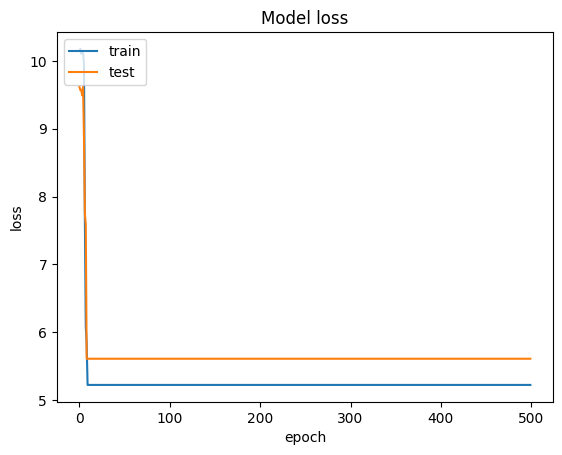

In [6]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


W naszym przypadku model jest lekko przeuczony względem danych. Poniżej tworzona jest jego reprezentacja graficzna, która znajduje się w pliku [model1.gv.pdf](model1.gv.pdf)


In [7]:
ann_viz(model1, filename="model1.gv",
        title="Model #1 visualization")


Poniżej zostaną wyświetlone dokładności oraz krzywe błędów dla innych modeli:

- z funkcją aktywacji sigmoid na wszystkich neuronach oraz funkcją optymalizacji 'adadelta'



accuracy: 36.80%


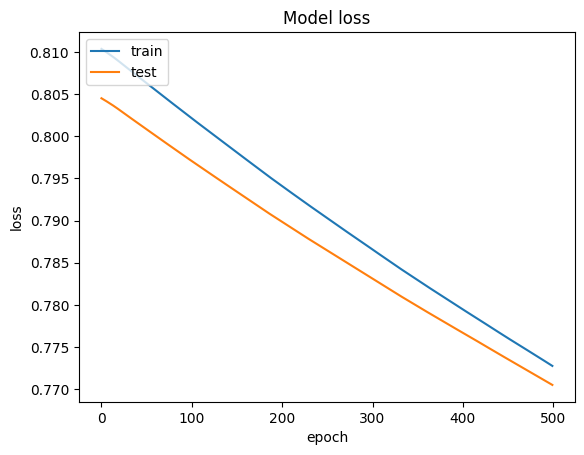

In [8]:
model2 = Sequential()
model2.add(Dense(6, input_shape=(8,), activation='sigmoid'))
model2.add(Dense(3, activation='sigmoid'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy',
               optimizer='adadelta', metrics=['accuracy'])

history2 = model2.fit(train_inputs, train_classes, validation_data=(test_inputs, test_classes),
                      epochs=500, batch_size=10, verbose=0)

scores = model2.evaluate(test_inputs, test_classes, verbose=0)
print("\n%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Po powyższym wykresie widać, że sieć nie jest dobrze nauczona;

- funkcją aktywacji 'tanh' w warstwach ukrytych oraz funkcją 'sigmoid' w warstwie wyjściowej oraz funkcją optymalizacji 'SGD'



accuracy: 62.34%


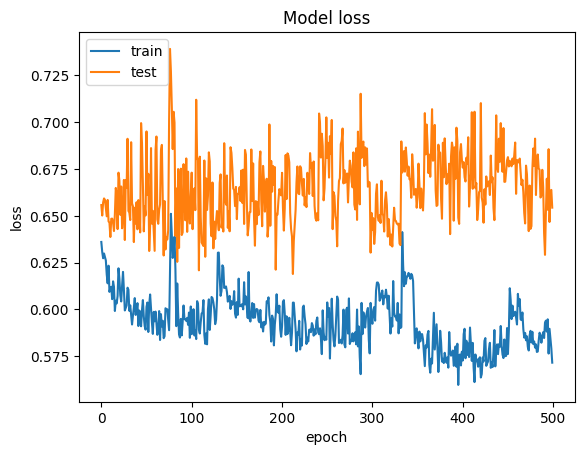

In [9]:
model3 = Sequential()
model3.add(Dense(6, input_shape=(8,), activation='tanh'))
model3.add(Dense(3, activation='tanh'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy',
               optimizer='sgd', metrics=['accuracy'])

history3 = model3.fit(train_inputs, train_classes, validation_data=(test_inputs, test_classes),
                      epochs=500, batch_size=10, verbose=0)

scores = model3.evaluate(test_inputs, test_classes, verbose=0)
print("\n%s: %.2f%%" % (model3.metrics_names[1], scores[1]*100))

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Powyższy model również nie jest dobrze nauczony na naszych danych. Wobec tego z 3 stworzonych przeze mnie modeli, najlepiej nauczony jest model #1.
